# Functions

In [1]:
def show_cm(model, y_test, pred):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot()
    plt.show()

# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('house-votes-84.csv', engine='c')
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   party             435 non-null    object
 1   infant            435 non-null    object
 2   water             435 non-null    object
 3   budget            435 non-null    object
 4   physician         435 non-null    object
 5   salvador          435 non-null    object
 6   religious         435 non-null    object
 7   satellite         435 non-null    object
 8   aid               435 non-null    object
 9   missile           435 non-null    object
 10  immigration       435 non-null    object
 11  synfuels          435 non-null    object
 12  education         435 non-null    object
 13  superfund         435 non-null    object
 14  crime             435 non-null    object
 15  dutyfree exports  435 non-null    object
dtypes: object(16)
memory usage: 54.5+ KB


In [5]:
df

,party,infant,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,dutyfree exports
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0
432,republican,0,?,0,1,1,1,0,0,0,0,1,1,1,1,0
433,republican,0,0,0,1,1,1,?,?,?,?,0,1,1,1,0


In [6]:
cols = df.columns
for col in cols:
    if col == 'party':
        continue
    else:
        df[col].replace('?', df[col].mode()[0], inplace=True)
        df[col] = df[col].astype(int)

df

,party,infant,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,dutyfree exports
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0
432,republican,0,1,0,1,1,1,0,0,0,0,1,1,1,1,0
433,republican,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   party             435 non-null    object
 1   infant            435 non-null    int64 
 2   water             435 non-null    int64 
 3   budget            435 non-null    int64 
 4   physician         435 non-null    int64 
 5   salvador          435 non-null    int64 
 6   religious         435 non-null    int64 
 7   satellite         435 non-null    int64 
 8   aid               435 non-null    int64 
 9   missile           435 non-null    int64 
 10  immigration       435 non-null    int64 
 11  synfuels          435 non-null    int64 
 12  education         435 non-null    int64 
 13  superfund         435 non-null    int64 
 14  crime             435 non-null    int64 
 15  dutyfree exports  435 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 54.5+ KB


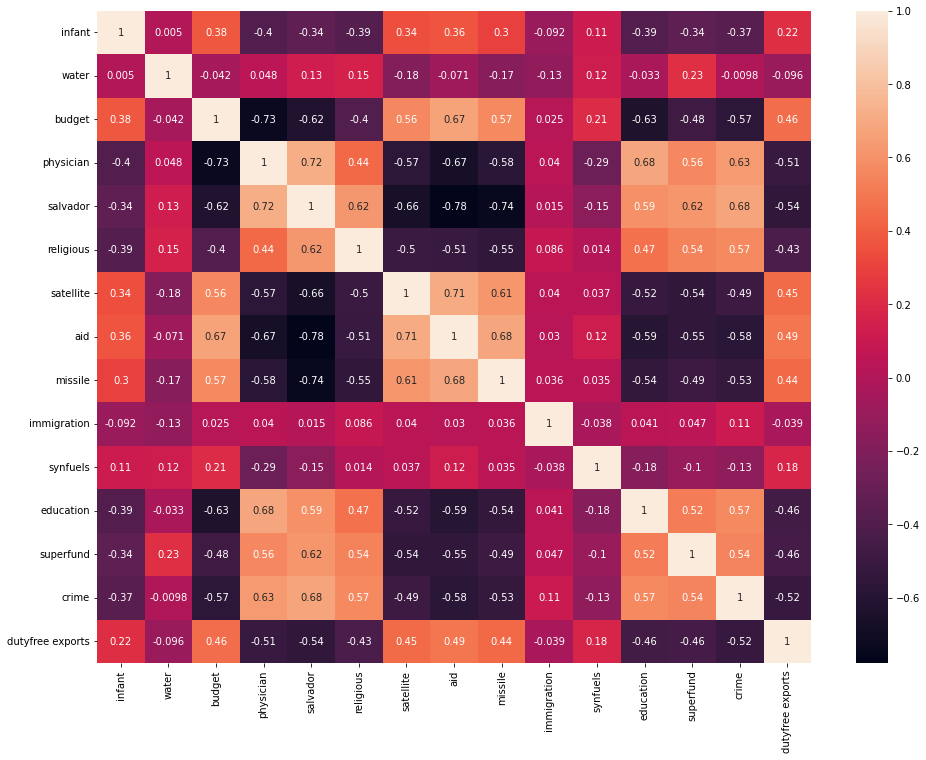

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(method='spearman'), annot=True);

In [9]:
x = df.drop('party', axis=1)
y = df['party']

# MODEL

In [10]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, mean_squared_log_error, accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [12]:
model = lgb.LGBMClassifier()

In [13]:
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], eval_metric='l1', early_stopping_rounds=1000)

[1]	valid_0's l1: 0.437659	valid_0's binary_logloss: 0.597954
[2]	valid_0's l1: 0.401014	valid_0's binary_logloss: 0.529545
[3]	valid_0's l1: 0.367759	valid_0's binary_logloss: 0.472874
[4]	valid_0's l1: 0.338365	valid_0's binary_logloss: 0.42649
[5]	valid_0's l1: 0.311466	valid_0's binary_logloss: 0.386492
[6]	valid_0's l1: 0.287327	valid_0's binary_logloss: 0.352485
[7]	valid_0's l1: 0.265938	valid_0's binary_logloss: 0.324048
[8]	valid_0's l1: 0.246256	valid_0's binary_logloss: 0.298654
[9]	valid_0's l1: 0.228848	valid_0's binary_logloss: 0.277439
[10]	valid_0's l1: 0.213107	valid_0's binary_logloss: 0.258442
[11]	valid_0's l1: 0.198967	valid_0's binary_logloss: 0.242474
[12]	valid_0's l1: 0.185804	valid_0's binary_logloss: 0.227455
[13]	valid_0's l1: 0.174227	valid_0's binary_logloss: 0.215223
[14]	valid_0's l1: 0.163724	valid_0's binary_logloss: 0.203757
[15]	valid_0's l1: 0.154301	valid_0's binary_logloss: 0.194437
[16]	valid_0's l1: 0.145396	valid_0's binary_logloss: 0.185075
[1

/opt/python/envs/default/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier()

In [14]:
y_pred = model.predict(x_test, num_iteration=model.best_iteration_)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.96      0.97        76
  republican       0.95      0.96      0.95        55

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



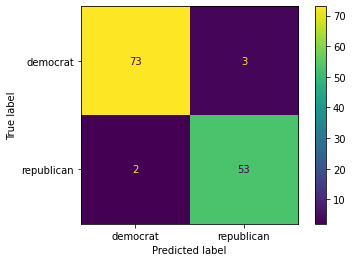

In [16]:
show_cm(model, y_test, y_pred)

In [17]:
print('train accuracy score', model.score(x_train, y_train))
print('test accuracy score', model.score(x_test, y_test))

train accuracy score 0.9967105263157895
test accuracy score 0.9618320610687023
